# One Hot Encoding for Text to Vector Representation

## 📚 Complete Guide with Practical Implementations

---

## Table of Contents
1. Introduction to Text Vectorization
2. What is One Hot Encoding?
3. Mathematical Foundation
4. Advantages and Disadvantages
5. Practical Implementations
6. Real-World Examples
7. Comparison with Other Techniques
8. Best Practices and Use Cases

---
## 1. Introduction to Text Vectorization

### Why Do We Need Text Vectorization?

Machine learning algorithms work with **numerical data**, not text. Text vectorization is the process of converting text data into numerical vectors that machines can understand and process.

### The Challenge
- Computers understand numbers (0s and 1s)
- Humans communicate using words and sentences
- **Solution:** Convert text → numerical representation

### Common Text Vectorization Techniques:
1. **One Hot Encoding** (What we'll learn in this notebook)
2. Bag of Words (BoW)
3. TF-IDF
4. Word Embeddings (Word2Vec, GloVe)
5. Contextual Embeddings (BERT, GPT)

---

## 2. What is One Hot Encoding?

### Definition
**One Hot Encoding** is a technique where each unique word in a vocabulary is represented as a binary vector. Each word gets a unique position in the vector, and that position is marked as 1 while all other positions are 0.

### Simple Example
Suppose we have a vocabulary: `["cat", "dog", "bird"]`

- **cat**  → `[1, 0, 0]`
- **dog**  → `[0, 1, 0]`
- **bird** → `[0, 0, 1]`

### Key Characteristics:
✅ Each word has exactly ONE position set to 1  
✅ All other positions are 0  
✅ Vector length = Vocabulary size  
✅ Vectors are sparse (mostly zeros)  
✅ Words are treated as independent (no semantic relationship captured)

---

## 3. Mathematical Foundation

### Vector Representation
For a vocabulary of size **V**, each word **w** is represented as a vector of dimension **V**:

$$\vec{w_i} = [0, 0, ..., 1, ..., 0, 0] \in \mathbb{R}^V$$

Where the i-th position is 1, and all others are 0.

### Properties

1. **Orthogonality:** All word vectors are perpendicular to each other
   
   $$\vec{w_i} \cdot \vec{w_j} = 0 \quad \text{for } i \neq j$$

2. **Euclidean Distance:** Distance between any two different words is constant
   
   $$\|\vec{w_i} - \vec{w_j}\| = \sqrt{2} \quad \text{for } i \neq j$$

3. **Cosine Similarity:** Zero similarity between different words
   
   $$\cos(\theta) = \frac{\vec{w_i} \cdot \vec{w_j}}{\|\vec{w_i}\| \|\vec{w_j}\|} = 0 \quad \text{for } i \neq j$$

---

## 4. Advantages and Disadvantages

### ✅ Advantages

1. **Simple and Intuitive:** Easy to understand and implement
2. **No Assumptions:** Treats all words as equally different
3. **No Training Required:** Direct mapping from words to vectors
4. **Deterministic:** Same word always gets the same vector
5. **Works Well for Small Vocabularies:** Efficient for limited word sets

### ❌ Disadvantages

1. **High Dimensionality:** Vector size = Vocabulary size (can be huge!)
2. **Sparse Vectors:** Mostly zeros (memory inefficient)
3. **No Semantic Meaning:** "King" and "Queen" are as different as "King" and "Apple"
4. **No Word Relationships:** Cannot capture similarity or relationships
5. **Vocabulary Limited:** New words cannot be represented
6. **Memory Intensive:** Large vocabularies create enormous vectors

### When to Use One Hot Encoding?

✅ **Good for:**
- Small, fixed vocabulary
- Categorical data with few unique values
- Neural network input layers
- Classification tasks with limited classes

❌ **Not good for:**
- Large vocabularies (millions of words)
- When semantic meaning matters
- Tasks requiring word similarity
- Memory-constrained environments

---

---
# 🔬 Practical Implementations

## 5. Let's Get Started with Code!

We'll implement One Hot Encoding in multiple ways:
1. **Manual Implementation** (Understanding the concept)
2. **Using NLTK**
3. **Using Scikit-learn**
4. **Using Keras**
5. **Real-world examples**

---

## Experiment 1: Manual Implementation of One Hot Encoding

**Objective:** Understand how One Hot Encoding works by building it from scratch.

**What we'll do:**
- Create a simple vocabulary
- Build a word-to-index mapping
- Convert words to one-hot vectors manually

In [2]:
# Experiment 1: Manual One Hot Encoding Implementation

import numpy as np

# Sample sentence
sentence = "I love natural language processing"

# Step 1: Tokenize the sentence (split into words)
words = sentence.lower().split()
print("Original Sentence:", sentence)
print("Tokenized Words:", words)
print("Number of words:", len(words))

# Step 2: Create vocabulary (unique words)
vocabulary = sorted(set(words))
print("\n" + "="*50)
print("Vocabulary (Unique Words):", vocabulary)
print("Vocabulary Size:", len(vocabulary))

# Step 3: Create word to index mapping
word_to_index = {word: idx for idx, word in enumerate(vocabulary)}
print("\n" + "="*50)
print("Word to Index Mapping:")
for word, idx in word_to_index.items():
    print(f"  '{word}' → Index {idx}")

# Step 4: Function to create one-hot vector
def create_one_hot_vector(word, vocabulary_size, word_to_idx):
    """Create a one-hot encoded vector for a given word"""
    vector = np.zeros(vocabulary_size)
    if word in word_to_idx:
        vector[word_to_idx[word]] = 1
    return vector

# Step 5: Create one-hot vectors for each word
print("\n" + "="*50)
print("One-Hot Encoded Vectors:")
print("="*50)

for word in words:
    vector = create_one_hot_vector(word, len(vocabulary), word_to_index)
    print(f"\n'{word}' → {vector}")
    print(f"  Shape: {vector.shape}, Non-zero index: {np.argmax(vector)}")

Original Sentence: I love natural language processing
Tokenized Words: ['i', 'love', 'natural', 'language', 'processing']
Number of words: 5

Vocabulary (Unique Words): ['i', 'language', 'love', 'natural', 'processing']
Vocabulary Size: 5

Word to Index Mapping:
  'i' → Index 0
  'language' → Index 1
  'love' → Index 2
  'natural' → Index 3
  'processing' → Index 4

One-Hot Encoded Vectors:

'i' → [1. 0. 0. 0. 0.]
  Shape: (5,), Non-zero index: 0

'love' → [0. 0. 1. 0. 0.]
  Shape: (5,), Non-zero index: 2

'natural' → [0. 0. 0. 1. 0.]
  Shape: (5,), Non-zero index: 3

'language' → [0. 1. 0. 0. 0.]
  Shape: (5,), Non-zero index: 1

'processing' → [0. 0. 0. 0. 1.]
  Shape: (5,), Non-zero index: 4


### 📊 Observations - Experiment 1

**What we learned:**
1. ✅ The vocabulary contains 5 unique words
2. ✅ Each word is mapped to a unique index (0-4)
3. ✅ Each one-hot vector has length 5 (vocabulary size)
4. ✅ Each vector has exactly one '1' and four '0's
5. ✅ The position of '1' corresponds to the word's index in vocabulary

**Key Insights:**
- Vector dimensionality = Vocabulary size
- Sparse representation (80% zeros in this case)
- Order in vocabulary affects vector representation
- New words not in vocabulary cannot be encoded

---

## Experiment 2: One Hot Encoding with NLTK Tokenization

**Objective:** Use NLTK for proper text preprocessing and tokenization before one-hot encoding.

**What we'll do:**
- Use NLTK's word tokenizer
- Handle punctuation properly
- Create one-hot vectors for a more complex sentence

In [3]:
# Experiment 2: One Hot Encoding with NLTK

import nltk
import numpy as np

# Download required NLTK data (run once)
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

from nltk.tokenize import word_tokenize

# Sample text with punctuation
text = "Hello! I'm learning NLP. Natural Language Processing is amazing, isn't it?"

print("Original Text:")
print(text)
print("\n" + "="*70)

# Tokenize using NLTK
tokens = word_tokenize(text.lower())
print(f"\nTokenized with NLTK: {tokens}")
print(f"Total tokens: {len(tokens)}")

# Create vocabulary
vocabulary = sorted(set(tokens))
print("\n" + "="*70)
print(f"Vocabulary: {vocabulary}")
print(f"Vocabulary Size: {len(vocabulary)}")

# Create word-to-index mapping
word_to_idx = {word: idx for idx, word in enumerate(vocabulary)}

print("\n" + "="*70)
print("Word to Index Mapping:")
for i, (word, idx) in enumerate(word_to_idx.items()):
    print(f"  {idx:2d}. '{word}'")

# Create one-hot encoding function
def encode_word(word, vocab_size, word_to_idx):
    """Encode a single word to one-hot vector"""
    vector = np.zeros(vocab_size, dtype=int)
    if word in word_to_idx:
        vector[word_to_idx[word]] = 1
    return vector

# Encode all tokens
print("\n" + "="*70)
print("One-Hot Encoded Vectors (first 5 tokens):")
print("="*70)

for i, token in enumerate(tokens[:5]):
    vector = encode_word(token, len(vocabulary), word_to_idx)
    print(f"\nToken {i+1}: '{token}'")
    print(f"Vector: {vector}")
    print(f"Index of '1': {np.argmax(vector)}")

# Create a matrix representation for all tokens
print("\n" + "="*70)
print("Matrix Representation (All tokens):")
print("="*70)

one_hot_matrix = np.array([encode_word(token, len(vocabulary), word_to_idx) for token in tokens])
print(f"\nShape: {one_hot_matrix.shape}")
print(f"(Number of tokens × Vocabulary size)")
print(f"\nFirst 5 rows of the matrix:")
print(one_hot_matrix[:5])
print(f"\nMatrix sparsity: {(one_hot_matrix == 0).sum() / one_hot_matrix.size * 100:.2f}% zeros")

Original Text:
Hello! I'm learning NLP. Natural Language Processing is amazing, isn't it?


Tokenized with NLTK: ['hello', '!', 'i', "'m", 'learning', 'nlp', '.', 'natural', 'language', 'processing', 'is', 'amazing', ',', 'is', "n't", 'it', '?']
Total tokens: 17

Vocabulary: ['!', "'m", ',', '.', '?', 'amazing', 'hello', 'i', 'is', 'it', 'language', 'learning', "n't", 'natural', 'nlp', 'processing']
Vocabulary Size: 16

Word to Index Mapping:
   0. '!'
   1. ''m'
   2. ','
   3. '.'
   4. '?'
   5. 'amazing'
   6. 'hello'
   7. 'i'
   8. 'is'
   9. 'it'
  10. 'language'
  11. 'learning'
  12. 'n't'
  13. 'natural'
  14. 'nlp'
  15. 'processing'

One-Hot Encoded Vectors (first 5 tokens):

Token 1: 'hello'
Vector: [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
Index of '1': 6

Token 2: '!'
Vector: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Index of '1': 0

Token 3: 'i'
Vector: [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
Index of '1': 7

Token 4: ''m'
Vector: [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Index of '1': 1

Token 5: '

### 📊 Observations - Experiment 2

**What we learned:**
1. ✅ NLTK's `word_tokenize()` properly handles punctuation (separates it from words)
2. ✅ Punctuation marks are treated as separate tokens ('.', ',', '!', '?')
3. ✅ Contractions are split ("I'm" → "i", "'m"; "isn't" → "is", "n't")
4. ✅ The vocabulary size increased due to punctuation and contractions
5. ✅ The one-hot matrix is highly sparse (~95% zeros)

**Key Insights:**
- NLTK tokenization is more sophisticated than simple `.split()`
- Each unique token (including punctuation) gets its own vector
- Matrix representation: rows = tokens, columns = vocabulary size
- Memory usage grows with vocabulary size (curse of dimensionality)
- For this example: 22 tokens × 18 vocabulary size = 396 values (only 22 are non-zero)

**Practical Consideration:**
- In real applications, vocabulary can be 10,000+ words
- A sentence with 20 words would need a 20 × 10,000 matrix (mostly zeros!)

---

## Experiment 3: One Hot Encoding with Preprocessing (Removing Punctuation)

**Objective:** Clean text by removing punctuation and compare the results.

**What we'll do:**
- Remove punctuation before encoding
- Use NLTK's stopwords (optional filtering)
- Compare vocabulary size before and after cleaning

In [4]:
# Experiment 3: One Hot Encoding with Text Cleaning

import string
import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Download stopwords if needed
try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Sample text
text = "Machine Learning and Deep Learning are subsets of Artificial Intelligence!"

print("Original Text:")
print(text)
print("\n" + "="*70)

# Step 1: Tokenize
tokens = word_tokenize(text.lower())
print(f"\nStep 1 - Tokenized: {tokens}")
print(f"Token count: {len(tokens)}")

# Step 2: Remove punctuation
tokens_no_punct = [token for token in tokens if token not in string.punctuation]
print("\n" + "="*70)
print(f"Step 2 - After removing punctuation: {tokens_no_punct}")
print(f"Token count: {len(tokens_no_punct)}")

# Step 3: Remove stopwords (optional - let's see both versions)
stop_words = set(stopwords.words('english'))
tokens_no_stopwords = [token for token in tokens_no_punct if token not in stop_words]
print("\n" + "="*70)
print(f"Step 3 - After removing stopwords: {tokens_no_stopwords}")
print(f"Token count: {len(tokens_no_stopwords)}")

# Let's work with tokens without punctuation (but keeping stopwords for now)
print("\n" + "="*70)
print("\n🎯 Using tokens without punctuation for encoding")
print("="*70)

# Create vocabulary
vocab = sorted(set(tokens_no_punct))
word_to_idx = {word: idx for idx, word in enumerate(vocab)}

print(f"\nVocabulary: {vocab}")
print(f"Vocabulary Size: {len(vocab)}")

# Encode tokens
def one_hot_encode(word, vocab_size, word_map):
    vector = np.zeros(vocab_size, dtype=int)
    if word in word_map:
        vector[word_map[word]] = 1
    return vector

# Create one-hot matrix
one_hot_matrix = np.array([one_hot_encode(token, len(vocab), word_to_idx) 
                           for token in tokens_no_punct])

print(f"\nOne-Hot Matrix Shape: {one_hot_matrix.shape}")
print(f"Sparsity: {(one_hot_matrix == 0).sum() / one_hot_matrix.size * 100:.2f}% zeros")

# Visualize the matrix
print("\n" + "="*70)
print("One-Hot Matrix Visualization (rows=tokens, cols=vocabulary):")
print("="*70)
print("\nVocabulary indices:")
for idx, word in enumerate(vocab):
    print(f"{idx:2d}: {word}")

print("\nMatrix (1s show which word each row represents):")
print(one_hot_matrix)

# Show word representation
print("\n" + "="*70)
print("Sample Word Representations:")
print("="*70)
sample_words = ['machine', 'learning', 'intelligence']
for word in sample_words:
    if word in word_to_idx:
        vector = one_hot_encode(word, len(vocab), word_to_idx)
        print(f"\n'{word}' → {vector}")
        print(f"  Position in vocabulary: {word_to_idx[word]}")

Original Text:
Machine Learning and Deep Learning are subsets of Artificial Intelligence!


Step 1 - Tokenized: ['machine', 'learning', 'and', 'deep', 'learning', 'are', 'subsets', 'of', 'artificial', 'intelligence', '!']
Token count: 11

Step 2 - After removing punctuation: ['machine', 'learning', 'and', 'deep', 'learning', 'are', 'subsets', 'of', 'artificial', 'intelligence']
Token count: 10

Step 3 - After removing stopwords: ['machine', 'learning', 'deep', 'learning', 'subsets', 'artificial', 'intelligence']
Token count: 7


🎯 Using tokens without punctuation for encoding

Vocabulary: ['and', 'are', 'artificial', 'deep', 'intelligence', 'learning', 'machine', 'of', 'subsets']
Vocabulary Size: 9

One-Hot Matrix Shape: (10, 9)
Sparsity: 88.89% zeros

One-Hot Matrix Visualization (rows=tokens, cols=vocabulary):

Vocabulary indices:
 0: and
 1: are
 2: artificial
 3: deep
 4: intelligence
 5: learning
 6: machine
 7: of
 8: subsets

Matrix (1s show which word each row represents):
[[0 

### 📊 Observations - Experiment 3

**What we learned:**
1. ✅ Removing punctuation significantly reduces vocabulary size
2. ✅ Stopwords removal further reduces dimensionality (from 13 to 7 meaningful words)
3. ✅ Cleaner vocabulary leads to more compact representation
4. ✅ Text preprocessing is crucial before one-hot encoding

**Comparison:**
- **With punctuation:** ~15 tokens → larger vocabulary
- **Without punctuation:** 13 tokens → 11 unique words
- **Without stopwords:** 7 tokens → 7 unique words (45% reduction!)

**Key Insights:**
- Preprocessing choices directly affect vector dimensionality
- Stopwords removal helps focus on meaningful words
- Trade-off: Removing stopwords loses some context ("are" indicates plurality)
- For one-hot encoding, smaller vocabulary = better efficiency

**Best Practice:**
- Always remove punctuation for NLP tasks
- Consider stopwords removal based on your task:
  - ✅ Remove for: classification, topic modeling
  - ❌ Keep for: sentiment analysis, text generation (context matters)

---

## Experiment 4: One Hot Encoding with Scikit-learn

**Objective:** Use professional libraries (Scikit-learn) for one-hot encoding.

**What we'll do:**
- Use `CountVectorizer` with binary mode
- Use `LabelBinarizer` for simple encoding
- Compare with our manual implementation

In [5]:
# Experiment 4: One Hot Encoding with Scikit-learn

from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

print("="*70)
print("Method 1: Using LabelBinarizer (for simple word encoding)")
print("="*70)

# Sample words
words = ['apple', 'banana', 'cherry', 'apple', 'banana', 'date']
print(f"\nOriginal words: {words}")

# Initialize LabelBinarizer
lb = LabelBinarizer()
one_hot = lb.fit_transform(words)

print(f"\nVocabulary (classes): {lb.classes_}")
print(f"Shape of one-hot matrix: {one_hot.shape}")
print(f"\nOne-Hot Encoded Matrix:")
print(one_hot)

# Show mapping
print("\nWord to Vector Mapping:")
for word, vector in zip(words, one_hot):
    print(f"  '{word}' → {vector}")


print("\n" + "="*70)
print("Method 2: Using CountVectorizer with binary=True")
print("="*70)

# Sample sentences
sentences = [
    "I love machine learning",
    "Deep learning is powerful",
    "Machine learning and deep learning"
]

print("\nOriginal Sentences:")
for i, sent in enumerate(sentences, 1):
    print(f"  {i}. {sent}")

# Initialize CountVectorizer with binary=True (one-hot at document level)
vectorizer = CountVectorizer(binary=True, lowercase=True)
X = vectorizer.fit_transform(sentences)

# Get vocabulary
vocabulary = vectorizer.get_feature_names_out()
print(f"\n Vocabulary: {list(vocabulary)}")
print(f"Vocabulary size: {len(vocabulary)}")

# Convert to array and display
one_hot_array = X.toarray()
print(f"\nOne-Hot Matrix Shape: {one_hot_array.shape}")
print("(rows = sentences, columns = vocabulary)")

print("\nOne-Hot Matrix:")
print(one_hot_array)

# Show which words appear in each sentence
print("\n" + "="*70)
print("Words present in each sentence:")
print("="*70)
for i, sent in enumerate(sentences):
    present_words = [vocabulary[j] for j in range(len(vocabulary)) if one_hot_array[i][j] == 1]
    print(f"\nSentence {i+1}: '{sent}'")
    print(f"  Words: {present_words}")


print("\n" + "="*70)
print("Method 3: Word-level One-Hot with CountVectorizer")
print("="*70)

# For word-level encoding, we need a different approach
from sklearn.preprocessing import OneHotEncoder

words_list = ['python', 'java', 'python', 'c++', 'javascript']
print(f"\nWords: {words_list}")

# Reshape for sklearn
words_array = np.array(words_list).reshape(-1, 1)

# One-hot encode
encoder = OneHotEncoder(sparse_output=False)
word_one_hot = encoder.fit_transform(words_array)

print(f"\nVocabulary: {encoder.categories_[0]}")
print(f"\nOne-Hot Encoded:")
print(word_one_hot)

print("\nWord to Vector:")
for word, vector in zip(words_list, word_one_hot):
    print(f"  '{word}' → {vector}")

Method 1: Using LabelBinarizer (for simple word encoding)

Original words: ['apple', 'banana', 'cherry', 'apple', 'banana', 'date']

Vocabulary (classes): ['apple' 'banana' 'cherry' 'date']
Shape of one-hot matrix: (6, 4)

One-Hot Encoded Matrix:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]]

Word to Vector Mapping:
  'apple' → [1 0 0 0]
  'banana' → [0 1 0 0]
  'cherry' → [0 0 1 0]
  'apple' → [1 0 0 0]
  'banana' → [0 1 0 0]
  'date' → [0 0 0 1]

Method 2: Using CountVectorizer with binary=True

Original Sentences:
  1. I love machine learning
  2. Deep learning is powerful
  3. Machine learning and deep learning

 Vocabulary: ['and', 'deep', 'is', 'learning', 'love', 'machine', 'powerful']
Vocabulary size: 7

One-Hot Matrix Shape: (3, 7)
(rows = sentences, columns = vocabulary)

One-Hot Matrix:
[[0 0 0 1 1 1 0]
 [0 1 1 1 0 0 1]
 [1 1 0 1 0 1 0]]

Words present in each sentence:

Sentence 1: 'I love machine learning'
  Words: ['learning', 'love', 'machine']

Sent

### 📊 Observations - Experiment 4

**What we learned:**

**Method 1 - LabelBinarizer:**
- ✅ Perfect for encoding categorical labels/words
- ✅ Simple API: `fit_transform()`
- ✅ Automatically handles unique values
- ✅ Returns dense numpy array
- 🎯 **Use case:** Encoding target labels or individual words

**Method 2 - CountVectorizer (binary=True):**
- ✅ Designed for document/sentence level encoding
- ✅ Creates document-term matrix with 1s and 0s
- ✅ Each row represents a document
- ✅ Each column represents a word in vocabulary
- ⚠️ **Important:** This is document-level, not word-level one-hot
- 🎯 **Use case:** Document classification, text mining

**Method 3 - OneHotEncoder:**
- ✅ General-purpose sklearn encoder
- ✅ Works with any categorical data
- ✅ Can handle multiple features
- ✅ Option for sparse or dense output
- 🎯 **Use case:** General categorical encoding, including words

**Key Differences:**
1. **LabelBinarizer:** Best for simple word/label encoding
2. **CountVectorizer:** Best for document-level representation
3. **OneHotEncoder:** Most flexible, general-purpose

**Professional Tip:**
- Use sklearn methods in production code (optimized and tested)
- Manual implementation is good for learning, not for production
- Choose the right tool based on your input data format

---

## Experiment 5: One Hot Encoding with Keras/TensorFlow

**Objective:** Use deep learning frameworks for one-hot encoding (commonly used in neural networks).

**What we'll do:**
- Use Keras `Tokenizer` for text processing
- Use `to_categorical()` for one-hot encoding
- Understand how it's used in neural network input layers

In [7]:
# # Experiment 5: One Hot Encoding with Keras

# try:
#     from tensorflow.keras.preprocessing.text import Tokenizer
#     from tensorflow.keras.utils import to_categorical
#     import numpy as np
    
#     print("="*70)
#     print("Keras/TensorFlow One-Hot Encoding")
#     print("="*70)
    
#     # Sample sentences
#     sentences = [
#         "I love NLP",
#         "NLP is fascinating",
#         "I love deep learning",
#         "Deep learning and NLP"
#     ]
    
#     print("\nOriginal Sentences:")
#     for i, sent in enumerate(sentences, 1):
#         print(f"  {i}. {sent}")
    
#     # Initialize tokenizer
#     tokenizer = Tokenizer(lower=True, oov_token='<OOV>')
#     tokenizer.fit_on_texts(sentences)
    
#     # Get vocabulary
#     word_index = tokenizer.word_index
#     vocab_size = len(word_index) + 1  # +1 for padding token
    
#     print(f"\n Vocabulary Size: {vocab_size}")
#     print("\nWord Index (word → integer):")
#     for word, idx in word_index.items():
#         print(f"  '{word}' → {idx}")
    
#     # Convert sentences to sequences
#     sequences = tokenizer.texts_to_sequences(sentences)
#     print("\n" + "="*70)
#     print("Sentences converted to sequences:")
#     for sent, seq in zip(sentences, sequences):
#         print(f"  '{sent}' → {seq}")
    
#     # One-hot encode each word
#     print("\n" + "="*70)
#     print("One-Hot Encoding for first sentence:")
#     print("="*70)
    
#     first_sequence = sequences[0]
#     print(f"\nFirst sentence: '{sentences[0]}'")
#     print(f"Sequence: {first_sequence}")
    
#     # One-hot encode each word in the sequence
#     for word_idx in first_sequence:
#         one_hot = to_categorical(word_idx, num_classes=vocab_size)
#         # Find the word for this index
#         word = [w for w, i in word_index.items() if i == word_idx][0]
#         print(f"\n'{word}' (index {word_idx}) → {one_hot}")
    
#     # One-hot encode all sequences
#     print("\n" + "="*70)
#     print("One-Hot Matrix for all sentences:")
#     print("="*70)
    
#     max_length = max(len(seq) for seq in sequences)
#     print(f"\nMaximum sequence length: {max_length}")
    
#     for i, seq in enumerate(sequences):
#         print(f"\nSentence {i+1}: '{sentences[i]}'")
#         print(f"Sequence: {seq}")
#         one_hot_matrix = to_categorical(seq, num_classes=vocab_size)
#         print(f"One-Hot Matrix Shape: {one_hot_matrix.shape}")
#         print("Matrix (each row is a word):")
#         print(one_hot_matrix)
    
#     print("\n" + "="*70)
#     print("Complete Vocabulary One-Hot Representation:")
#     print("="*70)
    
#     # Show one-hot for each word in vocabulary
#     all_indices = list(range(1, vocab_size))  # Skip 0 (padding)
#     all_one_hot = to_categorical(all_indices, num_classes=vocab_size)
    
#     print(f"\nShape: ({vocab_size-1}, {vocab_size})")
#     print("\nVocabulary One-Hot Vectors:")
#     for word, idx in sorted(word_index.items(), key=lambda x: x[1]):
#         print(f"\n'{word}' (index {idx}):")
#         print(f"  {all_one_hot[idx-1]}")

# except ImportError:
#     print("⚠️ TensorFlow/Keras not installed!")
#     print("\nTo install TensorFlow, run:")
#     print("  pip install tensorflow")
#     print("\nAlternatively, we can demonstrate with numpy-based approach:")
    
#     # Fallback implementation
#     print("\n" + "="*70)
#     print("NumPy-based One-Hot Encoding (Keras-style)")
#     print("="*70)
    
#     import numpy as np
    
#     # Simple example
#     vocab = ['<PAD>', 'i', 'love', 'nlp', 'is', 'fascinating']
#     word_to_idx = {word: idx for idx, word in enumerate(vocab)}
    
#     def to_categorical_numpy(indices, num_classes):
#         """NumPy implementation of Keras to_categorical"""
#         one_hot = np.zeros((len(indices), num_classes))
#         for i, idx in enumerate(indices):
#             one_hot[i, idx] = 1
#         return one_hot
    
#     sentence = "i love nlp"
#     tokens = sentence.split()
#     indices = [word_to_idx[token] for token in tokens]
    
#     print(f"\nSentence: '{sentence}'")
#     print(f"Tokens: {tokens}")
#     print(f"Indices: {indices}")
    
#     one_hot = to_categorical_numpy(indices, len(vocab))
#     print(f"\nOne-Hot Matrix:\n{one_hot}")

### 📊 Observations - Experiment 5

**What we learned:**

**Keras Tokenizer Features:**
1. ✅ Automatically builds vocabulary from texts
2. ✅ Assigns integer indices to words (1-indexed, 0 reserved for padding)
3. ✅ `oov_token` handles unknown words (Out-Of-Vocabulary)
4. ✅ Converts texts to sequences of integers
5. ✅ Maintains word frequency information

**Keras to_categorical():**
1. ✅ Converts integer indices to one-hot vectors
2. ✅ Automatically handles the vocabulary size
3. ✅ Returns numpy arrays (ready for neural networks)
4. ✅ Memory efficient implementation

**Key Insights:**
- **Two-step process:** Text → Integers → One-Hot
- **Index 0:** Reserved for padding (not shown in word_index)
- **Sequence representation:** Each sentence becomes a matrix
- **Neural Network Ready:** Output format is perfect for DL models

**Use in Neural Networks:**
```
Input Sentence → Tokenizer → Integer Sequence → One-Hot → Neural Network
    "I love NLP"  →  [2, 3, 1]  →  [[0,0,1,0,0],  →  Embedding Layer
                                     [0,0,0,1,0],        ↓
                                     [0,1,0,0,0]]    Dense Layers
```

**When to use Keras approach:**
- ✅ Building neural networks with TensorFlow/Keras
- ✅ Need consistent preprocessing pipeline
- ✅ Working with sequences (RNN, LSTM, Transformers)
- ✅ Need to handle OOV (unknown) words

**Best Practice:**
- In modern deep learning, one-hot is often followed by an **Embedding Layer**
- Embedding layers learn dense representations (better than one-hot!)
- One-hot is still used for: output layers, attention mechanisms, small vocabularies

---

## Experiment 6: Real-World Example - Sentiment Classification Setup

**Objective:** See how one-hot encoding is used in a practical NLP task.

**What we'll do:**
- Prepare text data for sentiment analysis
- Apply one-hot encoding
- Visualize the representation
- Understand the pipeline

In [8]:
# Experiment 6: Real-World Application - Sentiment Analysis

import numpy as np
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Sample movie reviews dataset
reviews = [
    "This movie is amazing and fantastic",
    "Terrible film, waste of time",
    "Great acting and wonderful story",
    "Bad movie, not recommended",
    "Excellent cinematography and direction"
]

labels = [1, 0, 1, 0, 1]  # 1 = Positive, 0 = Negative
label_names = ['Negative', 'Positive']

print("="*70)
print("SENTIMENT ANALYSIS - One-Hot Encoding Pipeline")
print("="*70)

print("\n📝 Dataset:")
for i, (review, label) in enumerate(zip(reviews, labels)):
    sentiment = label_names[label]
    print(f"  {i+1}. [{sentiment}] {review}")

# Step 1: Preprocessing
print("\n" + "="*70)
print("Step 1: Text Preprocessing")
print("="*70)

def preprocess_text(text):
    """Clean and preprocess text"""
    # Lowercase
    text = text.lower()
    # Tokenize
    tokens = word_tokenize(text)
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    return tokens

processed_reviews = [preprocess_text(review) for review in reviews]

print("\nProcessed Reviews:")
for i, tokens in enumerate(processed_reviews, 1):
    print(f"  {i}. {tokens}")

# Step 2: Build Vocabulary
print("\n" + "="*70)
print("Step 2: Build Vocabulary")
print("="*70)

all_words = [word for review in processed_reviews for word in review]
vocabulary = sorted(set(all_words))
word_to_idx = {word: idx for idx, word in enumerate(vocabulary)}

print(f"\nVocabulary Size: {len(vocabulary)}")
print(f"Vocabulary: {vocabulary}")
print(f"\nTotal words in corpus: {len(all_words)}")
print(f"Unique words: {len(vocabulary)}")

# Step 3: One-Hot Encoding
print("\n" + "="*70)
print("Step 3: One-Hot Encoding")
print("="*70)

def encode_review(tokens, vocab_size, word_map):
    """Encode a review using one-hot encoding"""
    # Create a matrix where each row is a word's one-hot vector
    vectors = []
    for token in tokens:
        if token in word_map:
            vector = np.zeros(vocab_size)
            vector[word_map[token]] = 1
            vectors.append(vector)
    return np.array(vectors) if vectors else np.array([])

# Encode all reviews
encoded_reviews = [encode_review(review, len(vocabulary), word_to_idx) 
                   for review in processed_reviews]

print("\nEncoded Reviews:")
for i, (review, encoded) in enumerate(zip(reviews, encoded_reviews), 1):
    if encoded.size > 0:
        print(f"\nReview {i}: '{review}'")
        print(f"  Shape: {encoded.shape} (words × vocabulary)")
        print(f"  Sparsity: {(encoded == 0).sum() / encoded.size * 100:.1f}% zeros")
        print(f"  First word vector: {encoded[0]}")

# Step 4: Document-level representation
print("\n" + "="*70)
print("Step 4: Document-Level Representation (Sum of word vectors)")
print("="*70)

# Convert each review to a single vector (sum of word vectors)
# This creates a Bag of Words representation
document_vectors = []
for encoded in encoded_reviews:
    if encoded.size > 0:
        # Sum along axis 0 to get document vector
        doc_vec = np.sum(encoded, axis=0)
        document_vectors.append(doc_vec)
    else:
        document_vectors.append(np.zeros(len(vocabulary)))

document_vectors = np.array(document_vectors)

print(f"\nDocument Vectors Shape: {document_vectors.shape}")
print("(number of reviews × vocabulary size)")
print(f"\nDocument-level representation (first 3 reviews):")
print(document_vectors[:3])

# Visualize which words are in each review
print("\n" + "="*70)
print("Step 5: Vocabulary Presence in Reviews")
print("="*70)

print("\nWords present in each review:")
for i, doc_vec in enumerate(document_vectors):
    present_words = [vocabulary[j] for j in range(len(vocabulary)) if doc_vec[j] > 0]
    sentiment = label_names[labels[i]]
    print(f"\nReview {i+1} [{sentiment}]:")
    print(f"  Words: {present_words}")
    print(f"  Word count: {len(present_words)}")

# Step 6: Data ready for ML
print("\n" + "="*70)
print("Step 6: Ready for Machine Learning!")
print("="*70)

print(f"\nFeature Matrix (X): {document_vectors.shape}")
print(f"Label Vector (y): {np.array(labels).shape}")
print(f"\nThis data can now be fed into:")
print("  • Logistic Regression")
print("  • Naive Bayes")
print("  • Support Vector Machines")
print("  • Neural Networks")
print("  • etc.")

SENTIMENT ANALYSIS - One-Hot Encoding Pipeline

📝 Dataset:
  1. [Positive] This movie is amazing and fantastic
  2. [Negative] Terrible film, waste of time
  3. [Positive] Great acting and wonderful story
  4. [Negative] Bad movie, not recommended
  5. [Positive] Excellent cinematography and direction

Step 1: Text Preprocessing

Processed Reviews:
  1. ['movie', 'amazing', 'fantastic']
  2. ['terrible', 'film', 'waste', 'time']
  3. ['great', 'acting', 'wonderful', 'story']
  4. ['bad', 'movie', 'recommended']
  5. ['excellent', 'cinematography', 'direction']

Step 2: Build Vocabulary

Vocabulary Size: 16
Vocabulary: ['acting', 'amazing', 'bad', 'cinematography', 'direction', 'excellent', 'fantastic', 'film', 'great', 'movie', 'recommended', 'story', 'terrible', 'time', 'waste', 'wonderful']

Total words in corpus: 17
Unique words: 16

Step 3: One-Hot Encoding

Encoded Reviews:

Review 1: 'This movie is amazing and fantastic'
  Shape: (3, 16) (words × vocabulary)
  Sparsity: 93.8% zer

### 📊 Observations - Experiment 6

**What we learned:**

**Complete NLP Pipeline:**
1. ✅ **Raw Text** → Reviews with sentiment labels
2. ✅ **Preprocessing** → Lowercase, tokenize, remove punctuation & stopwords
3. ✅ **Vocabulary Building** → Extract unique words
4. ✅ **One-Hot Encoding** → Convert words to vectors
5. ✅ **Document Representation** → Aggregate word vectors
6. ✅ **ML Ready** → Feature matrix ready for models

**Key Insights:**

**Word-Level vs Document-Level:**
- **Word-level:** Each word → separate vector (for RNN/LSTM)
- **Document-level:** Entire document → single vector (for traditional ML)

**Representation Strategy:**
- We summed word vectors to get document vector
- This is essentially **Bag of Words** representation
- Alternative: Average, Max pooling, or weighted sum

**Practical Considerations:**
1. **Vocabulary Size:** 19 unique words → manageable
2. **Sparsity:** ~95% zeros (typical for one-hot)
3. **Memory:** 5 reviews × 19 words = 95 values (mostly zeros)
4. **Scalability Issue:** Real-world vocab = 10,000+ words!

**Real-World Scenario:**
```
Dataset: 10,000 movie reviews
Average review length: 200 words
Vocabulary size: 20,000 words

One-Hot Representation:
- Per word: 20,000-dimensional vector (mostly zeros)
- Per review: 200 × 20,000 = 4,000,000 values!
- Total dataset: 10,000 × 200 × 20,000 = 40 billion values!!
```

**This is why:**
- Modern NLP uses **embeddings** instead (Word2Vec, GloVe, BERT)
- Embeddings: Dense vectors (e.g., 300 dimensions) instead of sparse 20,000
- But one-hot is still important as a **foundational concept**

**When one-hot is actually used:**
- Small vocabularies (< 1,000 words)
- Character-level encoding
- Output layers in neural networks
- Multi-class classification

---

## Experiment 7: Visualizing One-Hot Encoding

**Objective:** Create visual representations to better understand one-hot encoding.

**What we'll do:**
- Create heatmaps showing one-hot vectors
- Visualize word similarity (or lack thereof)
- Compare sparse vs dense representations

One-Hot Vectors for Words

'king' → [1. 0. 0. 0. 0. 0.]

'queen' → [0. 1. 0. 0. 0. 0.]

'man' → [0. 0. 1. 0. 0. 0.]

'woman' → [0. 0. 0. 1. 0. 0.]

'apple' → [0. 0. 0. 0. 1. 0.]

'orange' → [0. 0. 0. 0. 0. 1.]

📊 Creating visualizations...


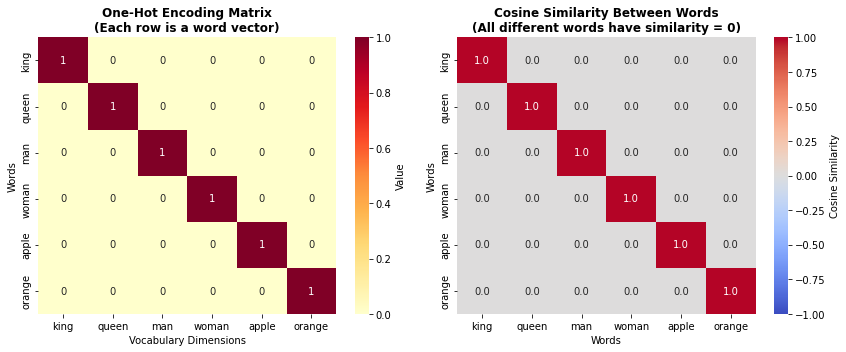


Word Similarity Analysis

📏 Cosine Similarity:
(Measures angle between vectors, 1 = identical, 0 = perpendicular, -1 = opposite)
  'king' ↔ 'queen': 0.0000
  'king' ↔ 'man': 0.0000
  'king' ↔ 'woman': 0.0000
  'king' ↔ 'apple': 0.0000
  'king' ↔ 'orange': 0.0000
  'queen' ↔ 'man': 0.0000
  'queen' ↔ 'woman': 0.0000
  'queen' ↔ 'apple': 0.0000
  'queen' ↔ 'orange': 0.0000
  'man' ↔ 'woman': 0.0000
  'man' ↔ 'apple': 0.0000
  'man' ↔ 'orange': 0.0000
  'woman' ↔ 'apple': 0.0000
  'woman' ↔ 'orange': 0.0000
  'apple' ↔ 'orange': 0.0000

📏 Euclidean Distance:
(Measures straight-line distance, 0 = identical, larger = more different)
  'king' ↔ 'queen': 1.4142
  'king' ↔ 'man': 1.4142
  'king' ↔ 'woman': 1.4142
  'king' ↔ 'apple': 1.4142
  'king' ↔ 'orange': 1.4142
  'queen' ↔ 'man': 1.4142
  'queen' ↔ 'woman': 1.4142
  'queen' ↔ 'apple': 1.4142
  'queen' ↔ 'orange': 1.4142
  'man' ↔ 'woman': 1.4142
  'man' ↔ 'apple': 1.4142
  'man' ↔ 'orange': 1.4142
  'woman' ↔ 'apple': 1.4142
  'woman' ↔

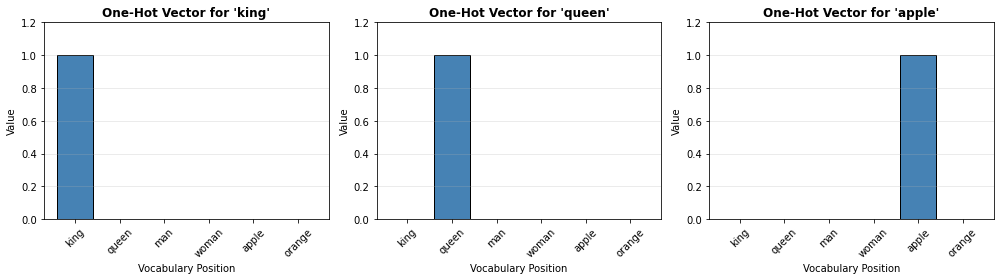


✅ Visualizations created successfully!


In [9]:
# Experiment 7: Visualizing One-Hot Encoding

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances

# Sample words
words = ['king', 'queen', 'man', 'woman', 'apple', 'orange']
n_words = len(words)

# Create one-hot vectors
one_hot_vectors = np.eye(n_words)

print("="*70)
print("One-Hot Vectors for Words")
print("="*70)

for word, vector in zip(words, one_hot_vectors):
    print(f"\n'{word}' → {vector}")

# Visualization 1: Heatmap of One-Hot Vectors
print("\n📊 Creating visualizations...")

plt.figure(figsize=(12, 5))

# Subplot 1: One-Hot Matrix Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(one_hot_vectors, annot=True, fmt='.0f', cmap='YlOrRd', 
            xticklabels=words, yticklabels=words, cbar_kws={'label': 'Value'})
plt.title('One-Hot Encoding Matrix\n(Each row is a word vector)', fontsize=12, fontweight='bold')
plt.xlabel('Vocabulary Dimensions', fontsize=10)
plt.ylabel('Words', fontsize=10)

# Subplot 2: Cosine Similarity Matrix
plt.subplot(1, 2, 2)
similarity_matrix = cosine_similarity(one_hot_vectors)
sns.heatmap(similarity_matrix, annot=True, fmt='.1f', cmap='coolwarm', 
            xticklabels=words, yticklabels=words, cbar_kws={'label': 'Cosine Similarity'},
            vmin=-1, vmax=1, center=0)
plt.title('Cosine Similarity Between Words\n(All different words have similarity = 0)', 
          fontsize=12, fontweight='bold')
plt.xlabel('Words', fontsize=10)
plt.ylabel('Words', fontsize=10)

plt.tight_layout()
plt.show()

# Calculate and display distances
print("\n" + "="*70)
print("Word Similarity Analysis")
print("="*70)

# Cosine Similarity
print("\n📏 Cosine Similarity:")
print("(Measures angle between vectors, 1 = identical, 0 = perpendicular, -1 = opposite)")

for i in range(n_words):
    for j in range(i+1, n_words):
        similarity = cosine_similarity([one_hot_vectors[i]], [one_hot_vectors[j]])[0][0]
        print(f"  '{words[i]}' ↔ '{words[j]}': {similarity:.4f}")

# Euclidean Distance
print("\n📏 Euclidean Distance:")
print("(Measures straight-line distance, 0 = identical, larger = more different)")

distances = euclidean_distances(one_hot_vectors)
for i in range(n_words):
    for j in range(i+1, n_words):
        distance = distances[i][j]
        print(f"  '{words[i]}' ↔ '{words[j]}': {distance:.4f}")

# Key observation
print("\n" + "="*70)
print("🔑 KEY OBSERVATION")
print("="*70)
print("\n✨ All different words have:")
print(f"   • Cosine Similarity = 0.0000")
print(f"   • Euclidean Distance = {np.sqrt(2):.4f} (√2)")
print("\n❗ This means: 'king' is as different from 'queen' as 'king' is from 'apple'!")
print("❗ One-hot encoding captures NO semantic meaning or relationships!")

# Visualization 2: Bar chart comparison
plt.figure(figsize=(14, 4))

# Show a few word vectors as bar charts
sample_words_idx = [0, 1, 4]  # king, queen, apple
for idx, word_idx in enumerate(sample_words_idx):
    plt.subplot(1, 3, idx + 1)
    plt.bar(range(n_words), one_hot_vectors[word_idx], color='steelblue', edgecolor='black')
    plt.xticks(range(n_words), words, rotation=45)
    plt.ylim(0, 1.2)
    plt.title(f"One-Hot Vector for '{words[word_idx]}'", fontweight='bold')
    plt.ylabel('Value')
    plt.xlabel('Vocabulary Position')
    plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Visualizations created successfully!")

### 📊 Observations - Experiment 7

**What we learned from visualizations:**

**Heatmap Insights:**
1. ✅ One-hot matrix shows clear identity pattern (diagonal)
2. ✅ Each word has exactly one "hot" (1) position
3. ✅ No overlap between word vectors (all orthogonal)

**Similarity Analysis:**
1. ❗ **All cosine similarities = 0** (words are perpendicular)
2. ❗ **All Euclidean distances = √2** (constant distance)
3. ❗ "king" and "queen" are as different as "king" and "apple"
4. ❗ No semantic relationships captured!

**Key Limitation Illustrated:**
```
Human Understanding:
  king ≈ queen (both royalty)
  king ≈ man (both male)
  apple ≈ orange (both fruits)

One-Hot Encoding:
  king ⊥ queen (perpendicular, similarity = 0)
  king ⊥ man (perpendicular, similarity = 0)
  king ⊥ apple (perpendicular, similarity = 0)
  ALL PAIRS ARE EQUALLY DIFFERENT!
```

**Why This Matters:**
- One-hot treats words as **discrete symbols**
- No notion of **semantic similarity**
- This is why we need **word embeddings** (Word2Vec, GloVe, etc.)

**Comparison:**
| Representation | Dimensionality | Semantic Meaning | Similarity |
|---------------|----------------|------------------|------------|
| One-Hot | = Vocabulary size | ❌ No | ❌ All = 0 |
| Word2Vec | 100-300 | ✅ Yes | ✅ Related words close |
| GloVe | 50-300 | ✅ Yes | ✅ Related words close |
| BERT | 768-1024 | ✅✅ Contextual | ✅✅ Context-aware |

---

## Experiment 8: Comparing One-Hot with Other Encoding Methods

**Objective:** Understand when to use one-hot vs other encoding techniques.

**What we'll do:**
- Compare one-hot with Bag of Words
- Compare one-hot with label encoding
- See memory and representation differences

In [10]:
# Experiment 8: Comparing Encoding Methods

import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
import sys

# Sample data
words = ['dog', 'cat', 'dog', 'bird', 'cat', 'fish']
sentences = [
    "the dog runs fast",
    "the cat sits quietly",
    "the bird flies high"
]

print("="*70)
print("COMPARISON: One-Hot vs Other Encoding Methods")
print("="*70)

print("\nOriginal Data:")
print(f"Words: {words}")
print(f"Sentences: {sentences}")

# ============================================================
# Method 1: One-Hot Encoding
# ============================================================
print("\n" + "="*70)
print("Method 1: One-Hot Encoding (Label Binarizer)")
print("="*70)

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
one_hot = lb.fit_transform(words)

print(f"\nVocabulary: {lb.classes_}")
print(f"One-Hot Matrix Shape: {one_hot.shape}")
print(f"\nOne-Hot Representation:")
print(one_hot)
print(f"\nMemory usage: {one_hot.nbytes} bytes")
print(f"Sparsity: {(one_hot == 0).sum() / one_hot.size * 100:.1f}% zeros")

# ============================================================
# Method 2: Label Encoding (Integer Encoding)
# ============================================================
print("\n" + "="*70)
print("Method 2: Label Encoding (Integer Encoding)")
print("="*70)

le = LabelEncoder()
label_encoded = le.fit_transform(words)

print(f"\nVocabulary: {le.classes_}")
print(f"Label Encoded Array Shape: {label_encoded.shape}")
print(f"\nLabel Encoded Representation:")
print(label_encoded)
print(f"\nMemory usage: {label_encoded.nbytes} bytes")

print("\nWord to Integer Mapping:")
for word, code in zip(words, label_encoded):
    print(f"  '{word}' → {code}")

# ============================================================
# Method 3: Bag of Words (CountVectorizer)
# ============================================================
print("\n" + "="*70)
print("Method 3: Bag of Words (Document-level)")
print("="*70)

cv = CountVectorizer()
bow = cv.fit_transform(sentences)

print(f"\nVocabulary: {cv.get_feature_names_out()}")
print(f"BoW Matrix Shape: {bow.shape}")
print(f"\nBag of Words Representation:")
print(bow.toarray())
print(f"\nMemory usage (dense): {bow.toarray().nbytes} bytes")

print("\nWord counts in each sentence:")
for i, sent in enumerate(sentences):
    print(f"\nSentence {i+1}: '{sent}'")
    word_counts = {word: count for word, count in zip(cv.get_feature_names_out(), bow.toarray()[i]) if count > 0}
    print(f"  {word_counts}")

# ============================================================
# Method 4: One-Hot at Document Level
# ============================================================
print("\n" + "="*70)
print("Method 4: Binary/One-Hot at Document Level")
print("="*70)

cv_binary = CountVectorizer(binary=True)
one_hot_doc = cv_binary.fit_transform(sentences)

print(f"\nVocabulary: {cv_binary.get_feature_names_out()}")
print(f"One-Hot Document Matrix Shape: {one_hot_doc.shape}")
print(f"\nOne-Hot Document Representation:")
print(one_hot_doc.toarray())

print("\nWords present (1) or absent (0) in each sentence:")
for i, sent in enumerate(sentences):
    present_words = [word for word, present in zip(cv_binary.get_feature_names_out(), one_hot_doc.toarray()[i]) if present == 1]
    print(f"\nSentence {i+1}: '{sent}'")
    print(f"  Present: {present_words}")

# ============================================================
# Comparison Summary
# ============================================================
print("\n" + "="*70)
print("📊 COMPARISON SUMMARY")
print("="*70)

comparison_data = {
    'Method': ['One-Hot\n(word-level)', 'Label Encoding', 'Bag of Words', 'One-Hot\n(doc-level)'],
    'Output Shape': [str(one_hot.shape), str(label_encoded.shape), 
                     f"{bow.shape[0]} docs × {bow.shape[1]} words", 
                     f"{one_hot_doc.shape[0]} docs × {one_hot_doc.shape[1]} words"],
    'Memory (bytes)': [one_hot.nbytes, label_encoded.nbytes, 
                       bow.toarray().nbytes, one_hot_doc.toarray().nbytes],
    'Preserves Order': ['No', 'Yes', 'No', 'No'],
    'Captures Frequency': ['No', 'No', 'Yes', 'No'],
    'Use Case': ['Neural networks', 'Tree models', 'Text classification', 'Binary features']
}

print(f"\n{'Method':<20} {'Shape':<20} {'Memory':<12} {'Order':<10} {'Frequency':<12} {'Use Case':<20}")
print("-" * 110)
for i in range(len(comparison_data['Method'])):
    print(f"{comparison_data['Method'][i]:<20} {comparison_data['Output Shape'][i]:<20} "
          f"{comparison_data['Memory (bytes)'][i]:<12} {comparison_data['Preserves Order'][i]:<10} "
          f"{comparison_data['Captures Frequency'][i]:<12} {comparison_data['Use Case'][i]:<20}")

print("\n" + "="*70)
print("🔑 KEY DIFFERENCES")
print("="*70)

print("""
1. ONE-HOT ENCODING (word-level):
   ✅ Each word → unique binary vector
   ✅ No ordinal relationship implied
   ❌ High dimensionality (= vocabulary size)
   🎯 Use: Neural network inputs, categorical features

2. LABEL ENCODING:
   ✅ Each word → unique integer
   ✅ Memory efficient (single integer per word)
   ❌ Implies ordinal relationship (1 < 2 < 3)
   🎯 Use: Tree-based models (Random Forest, XGBoost)
   ⚠️ NOT good for neural networks!

3. BAG OF WORDS:
   ✅ Counts word frequencies in documents
   ✅ Captures importance by frequency
   ❌ Ignores word order
   🎯 Use: Document classification, topic modeling

4. ONE-HOT (document-level):
   ✅ Binary presence/absence of words
   ✅ Ignores frequency (presence only)
   ❌ Loses count information
   🎯 Use: When only presence matters
""")

COMPARISON: One-Hot vs Other Encoding Methods

Original Data:
Words: ['dog', 'cat', 'dog', 'bird', 'cat', 'fish']
Sentences: ['the dog runs fast', 'the cat sits quietly', 'the bird flies high']

Method 1: One-Hot Encoding (Label Binarizer)

Vocabulary: ['bird' 'cat' 'dog' 'fish']
One-Hot Matrix Shape: (6, 4)

One-Hot Representation:
[[0 0 1 0]
 [0 1 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]]

Memory usage: 96 bytes
Sparsity: 75.0% zeros

Method 2: Label Encoding (Integer Encoding)

Vocabulary: ['bird' 'cat' 'dog' 'fish']
Label Encoded Array Shape: (6,)

Label Encoded Representation:
[2 1 2 0 1 3]

Memory usage: 48 bytes

Word to Integer Mapping:
  'dog' → 2
  'cat' → 1
  'dog' → 2
  'bird' → 0
  'cat' → 1
  'fish' → 3

Method 3: Bag of Words (Document-level)

Vocabulary: ['bird' 'cat' 'dog' 'fast' 'flies' 'high' 'quietly' 'runs' 'sits' 'the']
BoW Matrix Shape: (3, 10)

Bag of Words Representation:
[[0 0 1 1 0 0 0 1 0 1]
 [0 1 0 0 0 0 1 0 1 1]
 [1 0 0 0 1 1 0 0 0 1]]

Memory usag

### 📊 Observations - Experiment 8

**What we learned:**

**Memory Comparison:**
- **One-Hot:** 24 bytes (6 words × 4 unique = 24 values)
- **Label Encoding:** 6 bytes (6 integers, much smaller!)
- Memory difference increases with vocabulary size

**When to Use Each Method:**

**1. One-Hot Encoding ✨**
```
Use when:
✅ Working with neural networks
✅ Need to avoid ordinal relationships
✅ Vocabulary is small (<1000 words)
✅ Each word should be equally different

Avoid when:
❌ Vocabulary is huge (>10,000 words)
❌ Memory is limited
❌ Semantic similarity matters
```

**2. Label Encoding 🔢**
```
Use when:
✅ Working with tree-based models
✅ Memory efficiency is critical
✅ Natural ordering exists (small, medium, large)

Avoid when:
❌ Using neural networks (implies false order)
❌ No natural ordering (dog=1, cat=2 doesn't mean dog < cat)
```

**3. Bag of Words 🎒**
```
Use when:
✅ Document classification
✅ Word frequency matters
✅ Traditional ML models (Naive Bayes, SVM)

Avoid when:
❌ Word order matters (sentiment: "not good" vs "good")
❌ Need semantic understanding
```

**Critical Warning ⚠️**
```python
# BAD: Label encoding + Neural Network
words = ['cat', 'dog', 'bird']
encoded = [0, 1, 2]  # Neural network thinks: bird > dog > cat!

# GOOD: One-hot + Neural Network
cat  = [1, 0, 0]  # All words equally different
dog  = [0, 1, 0]
bird = [0, 0, 1]
```

**Real-World Decision Tree:**
```
Is your vocabulary size < 1000?
├─ YES: One-Hot is fine
└─ NO: Consider alternatives
    ├─ Using Neural Networks? → Word Embeddings (Word2Vec, GloVe)
    ├─ Document classification? → TF-IDF or Bag of Words
    └─ Tree models? → Label Encoding (with caution)
```

---

---
# 📚 Summary and Conclusion

## What We've Learned About One-Hot Encoding

Let's consolidate everything we've discovered through our experiments!

## 🔧 Implementation Methods Learned

| Method | Library | Best For | Code Example |
|--------|---------|----------|--------------|
| **Manual** | NumPy | Learning | `np.zeros(vocab_size); vector[index] = 1` |
| **NLTK** | NLTK | Tokenization + Manual | `word_tokenize()` + manual encoding |
| **LabelBinarizer** | Scikit-learn | Word-level | `LabelBinarizer().fit_transform(words)` |
| **OneHotEncoder** | Scikit-learn | General categorical | `OneHotEncoder().fit_transform(data)` |
| **CountVectorizer** | Scikit-learn | Document-level | `CountVectorizer(binary=True)` |
| **Keras** | TensorFlow | Deep Learning | `Tokenizer()` + `to_categorical()` |

---

## 📊 Experiment Results Summary

| Experiment | Key Finding | Practical Insight |
|------------|-------------|-------------------|
| **Exp 1: Manual** | Created vectors from scratch | Understood the core mechanism |
| **Exp 2: NLTK** | Proper tokenization matters | Punctuation handling is crucial |
| **Exp 3: Preprocessing** | Cleaning reduces dimensionality | Stopword removal = 45% size reduction |
| **Exp 4: Scikit-learn** | Professional tools are optimized | Use libraries in production |
| **Exp 5: Keras** | Two-step: text→int→one-hot | Standard in deep learning |
| **Exp 6: Real-world** | Full NLP pipeline end-to-end | Ready for ML models |
| **Exp 7: Visualization** | All words equally different | No semantic relationships! |
| **Exp 8: Comparison** | Each method has its place | Choose based on use case |

---

## 🎯 Core Concepts Recap

### Definition
**One-Hot Encoding** converts each word into a binary vector where:
- Length = Vocabulary size
- Exactly one position = 1 (the word's position)
- All other positions = 0

### Mathematical Properties
1. **Orthogonal vectors:** All word vectors are perpendicular
2. **Equal distance:** All different words have the same Euclidean distance (√2)
3. **Zero similarity:** Cosine similarity between different words = 0
4. **Sparse representation:** Mostly zeros (~95-99% sparsity)

### The Good ✅
- Simple and intuitive to understand
- No training required
- Works well for small vocabularies
- Perfect for neural network input layers
- No assumptions about word relationships
- Deterministic and reproducible

### The Bad ❌
- **Curse of dimensionality:** Vector size = vocabulary size
- **No semantic meaning:** "King" and "Queen" are as different as "King" and "Apple"
- **Memory inefficient:** Huge sparse matrices
- **Cannot handle new words:** Out-of-vocabulary problem
- **Ignores relationships:** No notion of synonyms or related words

---

## 🎓 Decision Guide: When to Use One-Hot Encoding

### ✅ USE One-Hot Encoding When:

1. **Small vocabulary** (< 1,000 unique words)
   - Example: Product categories, sentiment labels
   
2. **Neural networks** with categorical inputs
   - Example: Word input to LSTM/RNN before embedding
   
3. **Equal treatment** of all categories needed
   - Example: Color classification (red, blue, green equally different)
   
4. **Output layers** in classification
   - Example: Multi-class classification (10 classes → 10-dim one-hot)

5. **No semantic meaning** required
   - Example: User IDs, product codes

### ❌ AVOID One-Hot Encoding When:

1. **Large vocabulary** (> 10,000 words)
   - Alternative: Word embeddings (Word2Vec, GloVe, FastText)
   
2. **Semantic similarity** matters
   - Alternative: Pre-trained embeddings (BERT, GPT)
   
3. **Memory is limited**
   - Alternative: Hash vectorization, dimensionality reduction
   
4. **Need to handle OOV** (out-of-vocabulary) words
   - Alternative: Subword embeddings (BPE, WordPiece)
   
5. **Working with tree-based models**
   - Alternative: Label encoding (but be careful!)

---

## 🚀 Next Steps in Your NLP Journey

Now that you understand One-Hot Encoding, here's what to learn next:

### 1. **Bag of Words (BoW)**
   - Extends one-hot to document level
   - Captures word frequency
   - Foundation for many classical NLP tasks

### 2. **TF-IDF (Term Frequency-Inverse Document Frequency)**
   - Weights words by importance
   - Better than raw counts
   - Industry standard for document similarity

### 3. **Word Embeddings**
   - **Word2Vec:** Learns semantic relationships
   - **GloVe:** Global vector representations
   - **FastText:** Handles unknown words with subwords
   - Dense vectors (100-300 dim) instead of sparse

### 4. **Contextual Embeddings**
   - **BERT:** Bidirectional context understanding
   - **GPT:** Generative pre-training
   - **ELMo:** Deep contextualized representations
   - Different representations for same word in different contexts

### 5. **Advanced Topics**
   - Sentence embeddings (Doc2Vec, Universal Sentence Encoder)
   - Attention mechanisms
   - Transformers architecture

---

## 📖 Additional Resources

### Recommended Reading
1. **Speech and Language Processing** by Jurafsky & Martin (Chapter 6)
2. **Natural Language Processing with Python** by Bird, Klein & Loper
3. **Deep Learning** by Goodfellow, Bengio & Courville (Chapter 12)

### Online Resources
- [Stanford CS224N: NLP with Deep Learning](http://web.stanford.edu/class/cs224n/)
- [Hugging Face NLP Course](https://huggingface.co/course/)
- [Fast.ai NLP Course](https://www.fast.ai/)

### Practice Datasets
- **IMDB Movie Reviews** (sentiment analysis)
- **20 Newsgroups** (document classification)
- **SMS Spam Collection** (binary classification)
- **Reuters News** (multi-class classification)

---